In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_IL = df[df['job_country'] == 'Israel']

In [4]:
df_IL_skills = df_IL.explode('job_skills')

In [8]:
df_IL_skills_count = df_IL_skills.groupby(['job_skills','job_title_short']).size()
df_IL_skills_count = df_IL_skills_count.reset_index(name='skill_count')
df_IL_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_IL_skills_count

,job_skills,job_title_short,skill_count
823,sql,Data Analyst,640
649,python,Data Engineer,556
824,sql,Data Engineer,469
650,python,Data Scientist,443
655,python,Software Engineer,430
...,...,...,...
151,css,Senior Data Engineer,1
771,shell,Data Analyst,1
148,css,Cloud Engineer,1
776,shell,Senior Data Scientist,1


In [11]:
job_titles = df_IL_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3] #The first 3 job titles with the most skills
job_titles = sorted(job_titles)
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

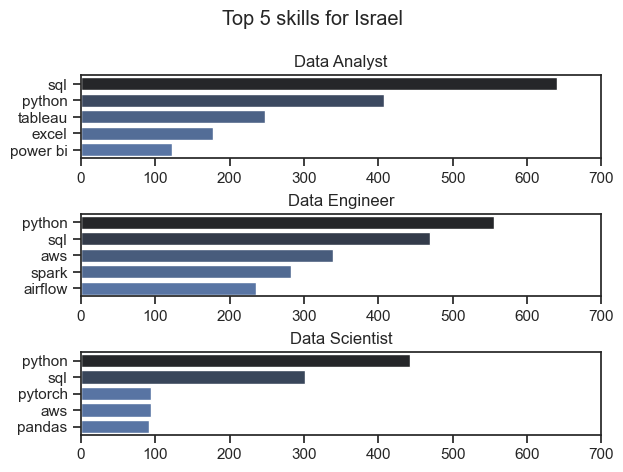

In [21]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_IL_skills_count_job_title = df_IL_skills_count[df_IL_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(x='skill_count', y='job_skills', data=df_IL_skills_count_job_title, ax=ax[i], hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,700)

fig.suptitle('Top 5 skills for Israel')
fig.tight_layout(h_pad=0.5)
plt.show()

In [22]:
# Counts does not show the portion of jobs that require the skill, so we will make the same graph with %
df_job_title_count = df_IL['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,919
1,Software Engineer,908
2,Data Engineer,801
3,Data Scientist,684
4,Business Analyst,471
5,Senior Data Engineer,288
6,Machine Learning Engineer,246
7,Senior Data Scientist,235
8,Senior Data Analyst,196
9,Cloud Engineer,139


In [23]:
df_skills_perc = pd.merge(df_IL_skills_count, df_job_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Analyst,640,919,69.640914
1,python,Data Engineer,556,801,69.413233
2,sql,Data Engineer,469,801,58.551810
3,python,Data Scientist,443,684,64.766082
4,python,Software Engineer,430,908,47.356828
...,...,...,...,...,...
955,css,Senior Data Engineer,1,288,0.347222
956,shell,Data Analyst,1,919,0.108814
957,css,Cloud Engineer,1,139,0.719424
958,shell,Senior Data Scientist,1,235,0.425532


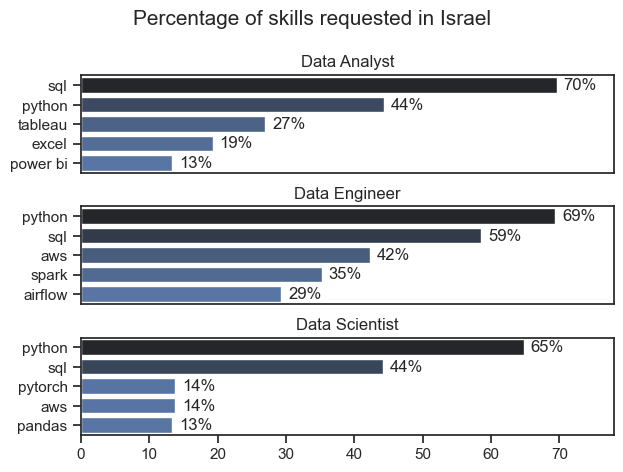

In [25]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Percentage of skills requested in Israel', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()